Outlier detection might be fun. PyOD is a library which can be used for outlier detection. There are multiple options for OD to use: Isolation Forests (iForest), unsupervised K-Nearest Neighbors (KNN), Local Outlier Factor (LOF) and it's extension Cluster-Based Local Outlier Factor (CBLOF), One-Class Support Vector Machine (OCSVM), Copula-Based Outlier Detection (COPOD)

The outliers in the data can be assumed to be natural phenomena, something within the expected possibilities. 
It could be an interesting idea to still have a futuristic change point detection, to warn as a potential low-cyclical, high-magnitude event.

A simpleRNN might be a good start just to check things
Turns out it's not possible to have inherent knowledge of which model will perform the best, so multiple models should be carried out. RNN, LSTM, deep LSTM, GRUm, bidirectional LSTM and LSTM with
a TimeDistributed layer.

Hourly time series have trends on multiple levels (daily, monthly, yearly). It is recommended to use MSTL for decomposition.

The idea in the end is to determine if a set of feature values is bellow or after a threshold, appropriate for scuba diving. This threshold is the calmness-factor of the sea. This would mean appropriate current, appropriate waves. Maybe it would be good to also find wind speed, direction, etc. for those locations as well.

Always keep the original, non-stationary data for reference and validation. You may want to compare the performance of models trained on both stationary and non-stationary features.

Facebooks Prophet automates model creation and also has changepoint detections.

In [8]:
from configparser import ConfigParser
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('C:\\Users\\24\\Desktop\\Scraper\\scuba_scrapper\\functions')

from functions.checks_and_preprocessing.missing_or_nan import check_missing_or_nan
from functions.checks_and_preprocessing.stationarity_normality import kpss_adf_stationarity, normality_testing, plot_comparison
from functions.data_load_and_transform.select_table_from_sql import get_beach_data
from functions.plotting.data_and_acf import create_widgets_and_plot

In [9]:
# Information loading to connect to the database
config = ConfigParser()
config.read('config/postgres_config.ini')
username = config['postgres_config']['username']
password = config['postgres_config']['password']
host = config['postgres_config']['host']
port = config['postgres_config']['port']
database_name = config['postgres_config']['database_name']

In [10]:
database_connector = f"postgresql://{username}:{password}@{host}:{port}/{database_name}"
config.read('config/beach_dir_config.ini')

In [ ]:
# Convert the extracted json files to the sql database. Filepath in beach_data_json_dir. JSON produced from black_sea_waves_reanalysis_to_json
#beach_data_json_dir = config['beach_dir_config']['dir']
#process_json_to_sql(database_connector, beach_data_json_dir) 

In [11]:
# We select one beach (via index), read it's data from the SQL database, and check for missing hours and NaN values
DATA_STARTDATE = "1979-01-01"
DATA_ENDDATE = "2021-12-31"

single_beach_data, beach_name_sql_table = get_beach_data(database_connector)
check_missing_or_nan(single_beach_data, beach_name_sql_table, DATA_STARTDATE, DATA_ENDDATE)


Selected Beach Details:
силистар
No missing hours in силистар.
No NaN in силистар


In [34]:
percentiles = [0.05, .10, .25, .5, .75, .90, .95]
single_beach_data.describe(percentiles=percentiles)

,VTMX,VHM0_WW,VZMX,VMDR_SW2,VMDR,VMDR_SW1,VTM10,VPED,VTPK,VTM02,VHM0_SW1,VMDR_WW,VTM01_SW2,VSDX,VTM01_SW1,VSDY,VHM0,VTM01_WW,VHM0_SW2
count,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000
mean,4.062734,0.424709,1.382679,128.229444,73.410849,83.034613,4.383151,72.602658,5.235563,3.426313,0.413646,134.956730,7.657055,-0.021160,4.259847,-0.030157,0.811858,2.074654,0.032015
std,1.053632,0.624675,1.182104,96.469069,55.576573,52.019360,1.228437,53.246500,1.535443,0.986501,0.383209,108.613573,7.886955,0.037465,1.283463,0.058350,0.622434,1.147467,0.066206
min,1.589031,0.010545,0.019536,0.000610,0.002319,0.001190,1.297298,0.015625,1.509112,1.131983,0.000000,0.000000,0.000000,-0.321853,0.000000,-0.379958,0.115944,1.000000,0.000000
5%,2.501122,0.020233,0.226212,17.034216,23.046213,28.768045,2.527240,23.053894,2.940834,1.944592,0.025827,8.798045,0.000000,-0.094659,2.458339,-0.148752,0.218854,1.000000,0.000000
10%,2.747599,0.026502,0.335548,25.819272,30.261035,35.526779,2.843742,27.255573,3.234917,2.171739,0.043651,16.235205,1.813550,-0.068880,2.726178,-0.113099,0.275060,1.000000,0.000136
25%,3.280564,0.052825,0.574063,52.618706,41.527939,51.164734,3.488757,37.289566,4.305675,2.691128,0.122580,35.649719,2.158447,-0.035247,3.331749,-0.054892,0.394528,1.240917,0.000624
50%,3.983885,0.171809,1.024316,96.421066,62.434967,73.411011,4.300359,67.716995,5.209867,3.369271,0.308512,120.990555,2.966668,-0.013251,4.156889,-0.012251,0.621714,1.676282,0.003934
75%,4.737000,0.498402,1.790923,172.500000,81.825844,94.386749,5.168965,82.152077,6.303939,4.074653,0.592826,194.792538,16.529614,-0.001884,5.000637,0.000389,1.014953,2.525899,0.029130
90%,5.460663,1.228340,2.936740,307.500000,127.683112,144.329941,6.003558,126.467130,6.934334,4.733276,0.920600,324.909222,20.590723,0.014616,5.851319,0.023546,1.609664,3.813832,0.102950


In [7]:
# We check if there are zero-valued or negative-valued features
zero_var_list = []
negative_var_list = []
for variable in single_beach_data.columns:
    if any(single_beach_data[variable] == 0):
        zero_var_list.append(variable)
    if any(single_beach_data[variable] < 0):
        negative_var_list.append(variable)

print(f'Features with zero values: {zero_var_list}') 
print(f'Features with negative values: {negative_var_list}') 


Features with zero values: ['VHM0_SW1', 'VMDR_WW', 'VTM01_SW2', 'VTM01_SW1', 'VHM0_SW2']
Features with negative values: ['VSDX', 'VSDY']


In [5]:
# Perform Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and Augmented Dickey-Fuller (ADF) stationarity tests 
# on every column
stationarity_dict = {}
for col in single_beach_data.columns:
    kpssh, adfh = kpss_adf_stationarity(single_beach_data[col])
    stationarity_dict[col] = [kpssh, adfh]

print(stationarity_dict)

{'VTMX': ['KPSS - Stationary', 'ADF - Stationary'], 'VHM0_WW': ['KPSS - Stationary', 'ADF - Stationary'], 'VZMX': ['KPSS - Stationary', 'ADF - Stationary'], 'VMDR_SW2': ['KPSS - Stationary', 'ADF - Stationary'], 'VMDR': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'], 'VMDR_SW1': ['KPSS - Stationary', 'ADF - Stationary'], 'VTM10': ['KPSS - Stationary', 'ADF - Stationary'], 'VPED': ['KPSS - Stationary', 'ADF - Stationary'], 'VTPK': ['KPSS - Stationary', 'ADF - Stationary'], 'VTM02': ['KPSS - Stationary', 'ADF - Stationary'], 'VHM0_SW1': ['KPSS - Stationary', 'ADF - Stationary'], 'VMDR_WW': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'], 'VTM01_SW2': ['KPSS - Stationary', 'ADF - Stationary'], 'VSDX': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'], 'VTM01_SW1': ['KPSS - Stationary', 'ADF - Stationary'], 'VSDY': ['KPSS - Stationary', 'ADF - Stationary'], 'VHM0': ['KPSS - Stationary', 'ADF - Stationary'], 'VTM01_WW': ['KPSS - Stationary', 'ADF 

In [6]:
# Function that iterates over non-normality columns and applies differencing. Check for normality afterwards.
# Get the name of the column that is non-stationary (stationarity_dict)
# Run plot_comparison, per column
for col in stationarity_dict:
    if stationarity_dict[col][0] == 'Non-stationary':
        plot_comparison(single_beach_data[col], plot_type='line')
        #Do the stationarity check after differencing, and print if the column is stationary. Disable plots.

In [16]:
normality_dict = normality_testing(single_beach_data[col])
print(normality_dict)

{'Shapiro-Wilk': 'Non-normality', "D'Agostino-Pearson": 'Non-normality', 'Anderson-Darling': 'Non-normality', 'Kolmogorov-Smirnov': 'Non-normality'}


In [17]:
#Implementation of option regarding non-stationarity. 
#Options are:

#Feature Engineering: Instead of differencing, you might consider transforming the feature in a way that retains its directional information while making it more stationary. 
#For example, you can use trigonometric functions to convert the direction into two features: sine and cosine of the angle. This representation can capture directional information in a stationary manner.

#Seasonal Decomposition: If your non-stationary feature exhibits strong seasonal or trend components, you can use techniques like seasonal decomposition (e.g., seasonal decomposition of time series or STL decomposition) 
#to extract these components. You can then work with the residual component, which is ideally more stationary.

#Differencing:

#

In [ ]:
#heatmap

In [13]:
# Interactive plot to help visualize the data and ACF/PACF, with customizable options.
create_widgets_and_plot(single_beach_data)

:Curve   [datetime]   (VTMX)

In [ ]:
#Stationarity: Ensure that your time series data is stationary before applying the Box-Cox transform. LSTM models typically assume stationary data. 
#You may need to difference or otherwise transform your data to achieve stationarity before considering the Box-Cox transformation.


#Non-Normality: If your data exhibits non-normality, the Box-Cox transformation can be applied to make it more closely resemble a normal distribution. 
#This can be beneficial if your LSTM model assumes normally distributed errors.

#Inverse Transformation: If you apply the Box-Cox transform to your data, remember that you'll need to apply the inverse Box-Cox 
#transformation to the model's predictions to obtain forecasts in the original scale.

#One thing to point out is that the boxcox function requires the data to be positive-only. 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


from functions.checks_and_preprocessing.lagging_and_splitting import split_dataframe, sliding_window
from functions.models.models_and_training import create_single_LTSM, train_model
from functions.plotting.forecast_plot import plot_forecast
from sklearn.preprocessing import MinMaxScaler

In [7]:
train, valid, test, test_index = split_dataframe(single_beach_data_monthly)
features = len(single_beach_data_monthly.columns)

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
valid_scaled = scaler.transform(valid)
test_scaled =scaler.transform(test)

df_scaled = scaler.transform(single_beach_data_monthly.values)

In [8]:
window_size = 12

trainX, trainY = sliding_window(train_scaled, window_size)
valX, valY = sliding_window(valid_scaled, window_size)
testX, testY = sliding_window(test_scaled, window_size)

In [43]:
def create_double_LTSM(units, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', 
                    return_sequences=True, input_shape=(window, 19)))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(19))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'root_mean_squared_error'])
    
    return model

In [45]:
def create_GRU(units, dropout=0.2):
    model = Sequential()
    model.add(GRU(units=units, activation='relu',
                    input_shape=(window, 19)))
    model.add(Dropout(dropout))
    model.add(Dense(19))
    return model

In [9]:
model = create_single_LTSM(units=32, window=12, features=19, dropout=0.2)

In [10]:
ltsm = train_model(model, trainX, trainY, valX, valY, epochs=1000, patience=50, batch_size=16)

Epoch 1/1000
22/22 - 2s - loss: 0.1518 - root_mean_squared_error: 0.3896 - mean_absolute_error: 0.3275 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2740 - val_mean_absolute_error: 0.2162 - 2s/epoch - 69ms/step
Epoch 2/1000
22/22 - 0s - loss: 0.0612 - root_mean_squared_error: 0.2473 - mean_absolute_error: 0.1954 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1795 - val_mean_absolute_error: 0.1428 - 85ms/epoch - 4ms/step
Epoch 3/1000
22/22 - 0s - loss: 0.0389 - root_mean_squared_error: 0.1973 - mean_absolute_error: 0.1550 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1654 - val_mean_absolute_error: 0.1320 - 82ms/epoch - 4ms/step
Epoch 4/1000
22/22 - 0s - loss: 0.0350 - root_mean_squared_error: 0.1871 - mean_absolute_error: 0.1468 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1607 - val_mean_absolute_error: 0.1285 - 83ms/epoch - 4ms/step
Epoch 5/1000
22/22 - 0s - loss: 0.0318 - root_mean_squared_error: 0.1784 - mean_absolute_error: 0.1401 - val_loss: 0.0251 - val_r

3/3 [==============================] - 0s 2ms/step


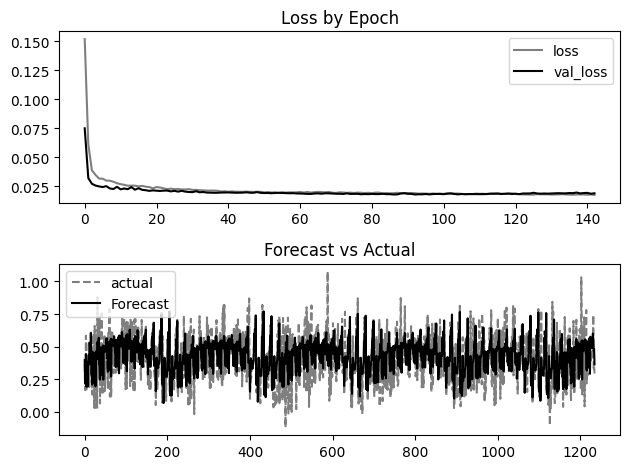

In [12]:
# what does this show me
plot_forecast(model, testX, testY, ltsm.history)

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
valPredict = model.predict(valX)

2/2 [==============================] - 0s 4ms/step


In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

valPredict = scaler.inverse_transform(valPredict)
valY = scaler.inverse_transform(valY)

In [15]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY.ravel(), trainPredict.ravel()))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY.ravel(), testPredict.ravel()))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.85 RMSE
Test Score: 9.30 RMSE


In [ ]:
#train_loss, train_acc = model.evaluate_generator(train_generator, steps=16) not _generator
#validation_loss, test_acc = model.evaluate_generator(validation_generator, steps=16)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
#batch normalization 

In [ ]:
#training loss, validation loss/ training, validation accuracy plot as well

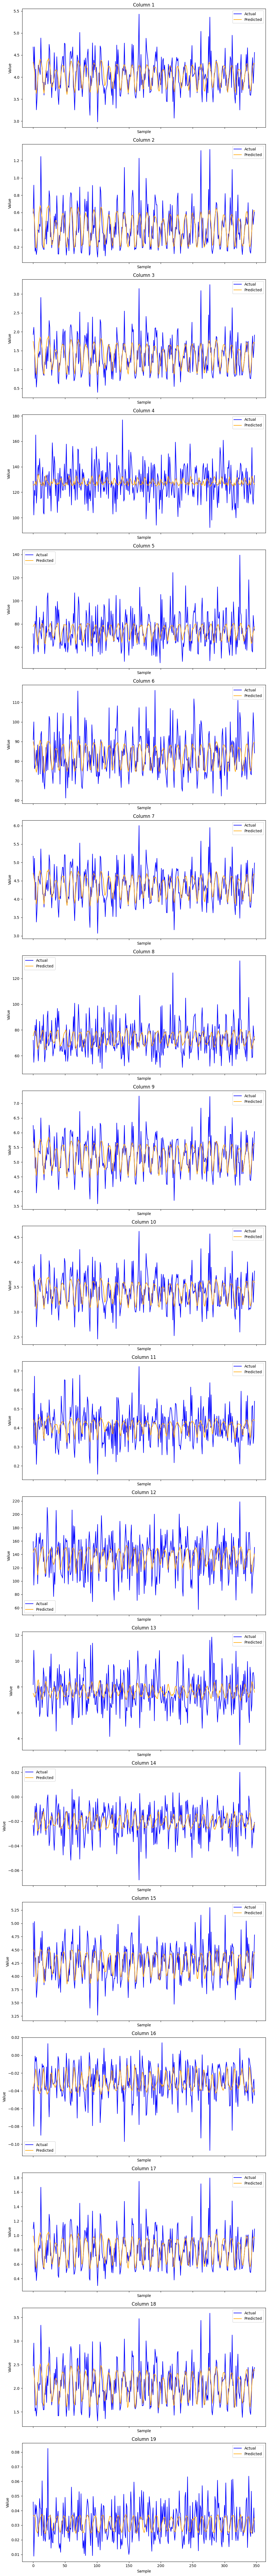

In [67]:
num_columns = trainY.shape[1]

# Create subplots for each column
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5*num_columns), sharex=True)

# Loop through each column and plot the actual vs. predicted values
for col in range(num_columns):
    actual = trainY[:, col]
    predicted = trainPredict[:, col]

    # Plot actual values in blue
    axes[col].plot(actual, label='Actual', color='blue')
    
    # Plot predicted values in orange
    axes[col].plot(predicted, label='Predicted', color='orange')
    
    # Add labels and legends
    axes[col].set_title(f'Column {col+1}')
    axes[col].set_xlabel('Sample')
    axes[col].set_ylabel('Value')
    axes[col].legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [160]:
#Tip: ACF - window size that aligns with these significant lags to capture these patterns of seasonality or temporality 
#Tip2: PACF - how many previous time steps to include in your window

In [162]:
test_loss, test_rmse, test_mae = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f"Test Loss: {test_loss}, Test RMSE: {test_rmse}, Test MAE: {test_mae}")


1/1 [==============================] - 0s 22ms/step - loss: 148.7558 - root_mean_squared_error: 12.1965 - mean_absolute_error: 5.9533
Test Loss: 148.75576782226562, Test RMSE: 12.196547508239746, Test MAE: 5.953326225280762


In [ ]:
#Feature Engineering:

#Lag Features: Create lag features (i.e., features with past values of the target variable) to capture autocorrelation. Experiment with different lag values to see which ones are most informative.

In [ ]:
#AFTER making the data stationary - autocorrelation

#ACF and PACF Plots: Compute and visualize the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for each feature and the target variable. 
#These plots can help you identify the lag values with significant autocorrelation.



In [ ]:
#Normalization: LSTM models are sensitive to the scale of input data. It’s common practice to normalize your data to a range like [0, 1] or [-1, 1]. 
#You can use methods like MinMaxScaler or StandardScaler from sklearn for this. Remember to fit the scaler on your training data and use it to transform your test data.

In [ ]:
#You can help the model capture trends by including lagged values of the target variable as input features. For example, 
#if you suspect a daily trend, you can include lagged values from the same hour on previous days.

In [ ]:
#use yearly just to test the models, the code, plots and functionality. Shouldn't take long to train. First do all models. Then see where to do hourly

In [ ]:
#First split, then normalize